In [1]:
import os
import string
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
# df - data frame
df = pd.read_csv('/content/drive/MyDrive/train-balanced-sarcasm.csv')
# dropping empty comment entries
df.dropna(subset=['comment'], inplace=True)

print('Type:')
print('Labels array ',type(df.label))
print('Comments array ',type(df.comment))
print('one comment line ', type(df.comment[0]))
print('Shape:')
print('Labels array ',df.label.shape)
print('Comments array ',df.comment.shape)
print('Two first entries:')
print (df.label[0], df.comment[0])
print (df.label[1], df.comment[1])

Type:
Labels array  <class 'pandas.core.series.Series'>
Comments array  <class 'pandas.core.series.Series'>
one comment line  <class 'str'>
Shape:
Labels array  (1010771,)
Comments array  (1010771,)
Two first entries:
0 NC and NH.
0 You do know west teams play against west teams more than east teams right?


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create the transform
tf_idf_vectorizer = TfidfVectorizer()
# tokenize and build vocab
T = tf_idf_vectorizer.fit(df.comment)
print(len(T.vocabulary_))

167435


In [4]:
# preprocess with nltk
def my_tokenizer(corpus):
    corpus_tokenized = []
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    sbs = nltk.stem.SnowballStemmer('english', ignore_stopwords=False)
    for comment in corpus:
        words = tokenizer.tokenize(comment)
        # Remove stop words
        stop_words = set(stopwords.words('english'))
        words = [word for word in words if not word in stop_words]

        cmnt_t = []
        for token in words:
            cmnt_t.append(sbs.stem(token))
            # make a string to be compatible with TfidfVectorizer
            c = ' '.join(cmnt_t)
        # Lemmitize
        #words = [lemmatizer.lemmatize(word) for word in words]

        corpus_tokenized.append(c)
    return corpus_tokenized

In [5]:
df2 = my_tokenizer(df.comment)

In [6]:
for i in range(10):
    print(df.comment[i])
    print(df2[i], '\n')

NC and NH.
nc nh 

You do know west teams play against west teams more than east teams right?
you know west team play west team east team right 

They were underdogs earlier today, but since Gronk's announcement this afternoon, the Vegas line has moved to patriots -1
they underdog earlier today sinc gronk announc afternoon vega line move patriot 1 

This meme isn't funny none of the "new york nigga" ones are.
this meme funni none new york nigga one 

I could use one of those tools.
i could use one tool 

I don't pay attention to her, but as long as she's legal I wouldn't kick her out of bed (before she took a load)
i pay attent long legal i kick bed took load 

Trick or treating in general is just weird...
trick treat general weird 

Blade Mastery+Masamune or GTFO!
blade masteri masamun gtfo 

You don't have to, you have a good build, buy games or save it
you good build buy game save 

I would love to see him at lolla.
i would love see lolla 



In [7]:
print(df2[0:5], '\n')
# convert to pandas Series type type to be compatible with TfidfVectorizer
df3 = pd.Series((v for v in df2))
print(type(df3), '\n')
print(type(df3[0]))
print(df3[0:5])

['nc nh', 'you know west team play west team east team right', 'they underdog earlier today sinc gronk announc afternoon vega line move patriot 1', 'this meme funni none new york nigga one', 'i could use one tool'] 

<class 'pandas.core.series.Series'> 

<class 'str'>
0                                                nc nh
1    you know west team play west team east team right
2    they underdog earlier today sinc gronk announc...
3              this meme funni none new york nigga one
4                                 i could use one tool
dtype: object


In [8]:
tf_idf_vectorizer2 = TfidfVectorizer()
T2 = tf_idf_vectorizer2.fit(df3)
print(len(T2.vocabulary_))

131021


In [14]:
from sklearn.model_selection import train_test_split
# divide into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.comment, df.label, train_size=0.33)

In [15]:
# Vetorize the training data set
X_train = tf_idf_vectorizer2.transform(X_train)
print(X_train.shape)
print(X_train[0:3])

(333554, 131021)
  (0, 129631)	0.2179638408128885
  (0, 127633)	0.2176940297958691
  (0, 126216)	0.340269171134213
  (0, 115642)	0.6054221471630394
  (0, 114778)	0.23027373882520158
  (0, 89745)	0.41538117555406034
  (0, 52025)	0.25451453303219035
  (0, 16128)	0.3639187066745204
  (1, 129631)	0.2485205541586652
  (1, 126030)	0.42299915946419653
  (1, 125869)	0.29641210117101224
  (1, 115097)	0.4577178770751383
  (1, 108080)	0.40815794263843724
  (1, 83738)	0.3900319835889736
  (1, 12075)	0.3784515849844951
  (2, 82407)	0.27907926898133484
  (2, 58272)	0.6378236569378188
  (2, 50467)	0.47409634764980835
  (2, 49257)	0.267687390693617
  (2, 44898)	0.3305349841886758
  (2, 34179)	0.3310868202019796


In [16]:
# Vetorize the test data set
X_test = tf_idf_vectorizer.transform(X_test)
print(X_test.shape)
print(X_test[0:3])

(677217, 167435)
  (0, 165906)	0.17238718000603842
  (0, 147395)	0.17698587923931622
  (0, 133956)	0.2956907710512197
  (0, 125662)	0.29339455666742065
  (0, 121730)	0.27158394943761904
  (0, 104293)	0.23295342534407645
  (0, 82551)	0.40644621289482447
  (0, 69609)	0.3386406561910228
  (0, 68753)	0.23721919317496565
  (0, 54254)	0.4102038860537111
  (0, 50491)	0.3646970373264114
  (1, 127762)	0.630640793257612
  (1, 111122)	0.7760748610020879
  (2, 158112)	0.6201985605337953
  (2, 102844)	0.3599458906783572
  (2, 13754)	0.6969883078614535


In [17]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

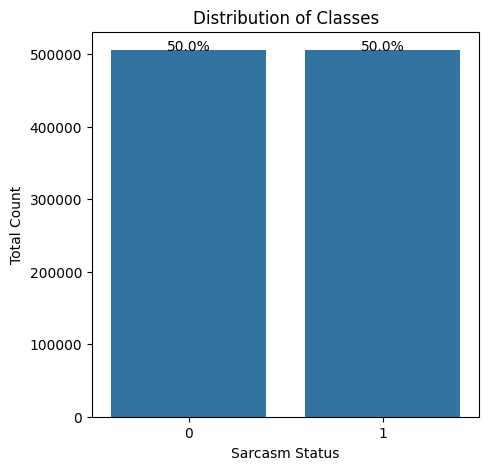

In [19]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x='label',  data= df)
ax.set(title = "Distribution of Classes", xlabel="Sarcasm Status", ylabel = "Total Count")
total = float(len(df ))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.1f}%'.format((height/total)*100),
            ha="center")
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
def print_metrices(pred,true):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ",accuracy_score(pred,true))
    print("Precison : ",precision_score(pred,true, average = 'weighted'))
    print("Recall : ",recall_score(pred,true,  average = 'weighted'))
    print("F1 : ",f1_score(pred,true,  average = 'weighted'))

In [22]:
#X_train, X_test, y_train, y_test = train_test_split(df.comment, df.label, train_size=0.33)
X_train,X_test,y_train,y_test = train_test_split(df.comment,df.label,test_size = 0.3,random_state = 42)

In [23]:
tfidf = TfidfVectorizer(ngram_range = (1,3))
X_tfidf_train = tfidf.fit_transform(X_train.tolist())
X_tfidf_test = tfidf.transform(X_test.tolist())

In [24]:
X_train.head()

694224                                        Who needs it.
68297     Because it's not sleepaway camp where you can ...
249383    You mean the team that plays Ohio State and Ho...
361388    Yeah, because this entire several paragraph ra...
278505    Well he is in college now so he should demand ...
Name: comment, dtype: object

In [25]:
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_tfidf_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [26]:
y_pred_lr = lr.predict(X_tfidf_test)
print_metrices(y_pred_lr,y_test)

[[110452  41046]
 [ 43177 108557]]
              precision    recall  f1-score   support

           0       0.72      0.73      0.72    151498
           1       0.73      0.72      0.72    151734

    accuracy                           0.72    303232
   macro avg       0.72      0.72      0.72    303232
weighted avg       0.72      0.72      0.72    303232

Accuracy :  0.722248971084846
Precison :  0.7223447077935667
Recall :  0.722248971084846
F1 :  0.7222611698323202


In [27]:
clf_nb = MultinomialNB()
clf_nb.fit(X_tfidf_train,y_train)
y_pred_nb = clf_nb.predict(X_tfidf_test)
print_metrices(y_pred_nb,y_test)

[[104987  46511]
 [ 40202 111532]]
              precision    recall  f1-score   support

           0       0.72      0.69      0.71    151498
           1       0.71      0.74      0.72    151734

    accuracy                           0.71    303232
   macro avg       0.71      0.71      0.71    303232
weighted avg       0.71      0.71      0.71    303232

Accuracy :  0.7140374366821444
Precison :  0.7149124652160971
Recall :  0.7140374366821444
F1 :  0.7141659155416942


In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

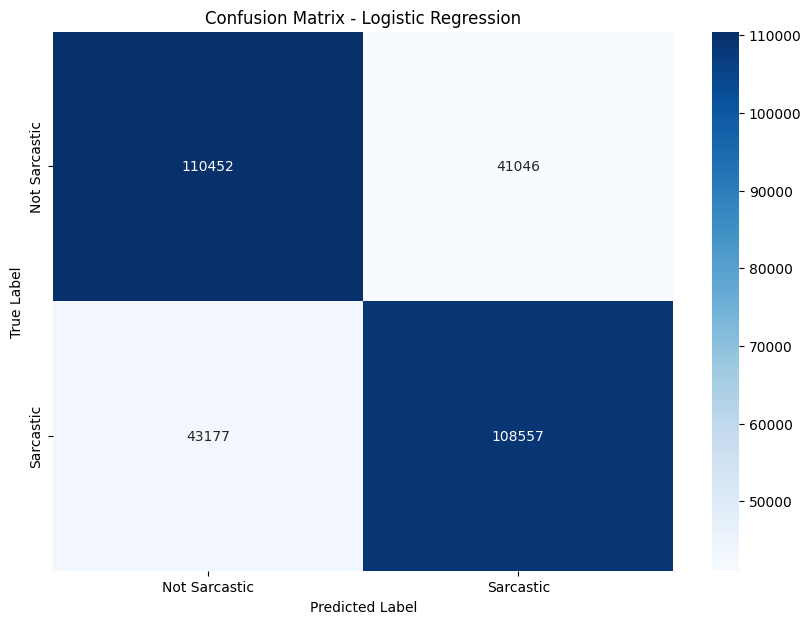

In [41]:
# Print confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred_lr)
# Display confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Sarcastic', 'Sarcastic'], yticklabels=['Not Sarcastic', 'Sarcastic'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

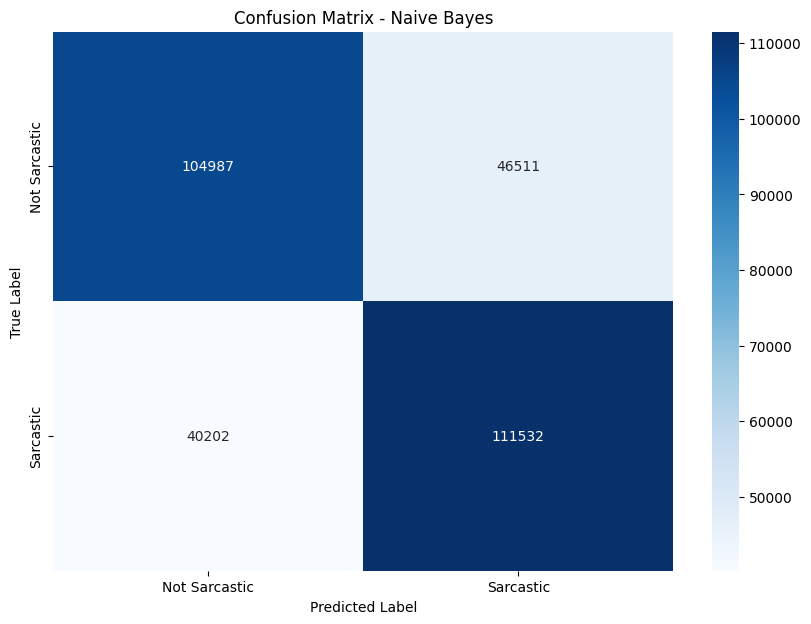

In [40]:
# Print confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred_nb)
# Display confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Sarcastic', 'Sarcastic'], yticklabels=['Not Sarcastic', 'Sarcastic'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

In [28]:
# Convert X_train to a NumPy array
X_train_array = X_train.to_numpy()

# Reshape the array
X_train_array = X_train_array.reshape(-1, 1)

print(X_train_array.shape)

(707539, 1)


In [29]:
acc_table = {
    'Logistic Regression' : accuracy_score(y_pred_lr,y_test),
    'Naive Bayes' : accuracy_score(y_pred_nb,y_test),
    }

In [30]:
acc_df = pd.DataFrame(acc_table.items(),columns = ['Model','Accuracy'])

In [31]:
!pip install seaborn

<Axes: xlabel='Model', ylabel='Accuracy'>

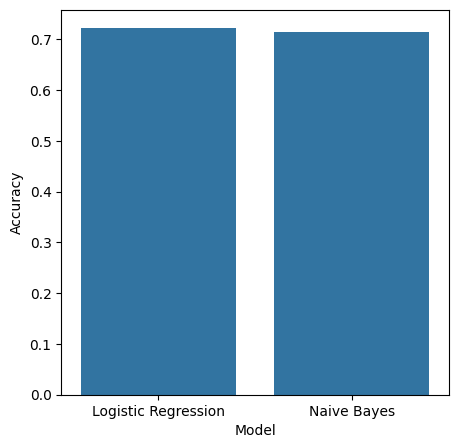

In [32]:
# fig, ax = plt.subplots()
import seaborn as sns
plt.figure(figsize = (5,5))
sns.barplot(x=acc_df['Model'], y=acc_df['Accuracy'], data=acc_df)